2.a)the process model and the data on the same graph.

The process model 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm

In [5]:
def process(q,alp):
    x0 = np.random.normal(0,1)
    X = np.zeros(30)
    X[0] = x0
    for i in range (1,30):
        delta = np.random.normal(0,q)
        X[i] = alp * X[i-1] + delta
    return X

The data model

In [20]:
def data(X,r,T,T1,T2):
    n = len(X)
    Y = np.zeros(n)
    for i in range(0,n):
        epsilon = np.random.normal(0,r)
        if i in range(0,T1+1):
            Y[i]=X[i]+epsilon
        if i in range(T1,T2+1):
            Y[i]=0.1*X[i]+epsilon
        if i in range(T2,T+1):
            Y[i]=X[i]+epsilon
    return Y

alp=0.8
q=0.4
r=0.1
T=30
T1=10
T2=20
X=process(alp,q)
Y=data(X,r,T,T1,T2)

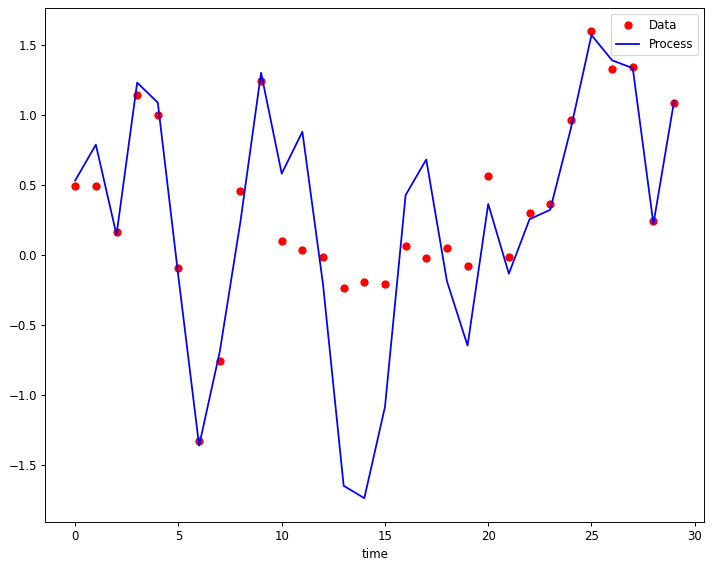

In [21]:
plt.figure(figsize=(10,8), dpi = 85)
plt.plot(Y, 'o',color='red',label='Data')
plt.plot(X, color ='blue',label='Process')
plt.xlabel('time')
plt.legend()
plt.show()

for using h_i=0.1 the data model will be more noiser than using h_i=1

b)Kalman filter to update the states xi

In [22]:
def Kalm(M,Q,R,H,y,sgm0,mu0):
    N = len(y)
    mu_old = np.zeros(N)
    sigma_old = np.zeros(N)
    mu_new = np.zeros(N+1)
    mu_new[0] = mu0
    sigma_new = np.zeros(N+1)
    sigma_new[0] = sgm0
    for t in range(1,N+1):
        mu_old[t-1] = M*mu_new[t-1]
        sigma_old[t-1] = Q + M*sigma_new[t-1]*M
        k = sigma_old[t-1]*H*(H*sigma_old[t-1]*H + R)**-1
        mu_new[t] = mu_old[t-1] + k*(y[t-1] - H*mu_old[t-1])
        sigma_new[t] = (1 - k*H)*sigma_old[t-1] 
    return mu_old, mu_new[1:], sigma_old, sigma_new[1:],k

q=0.4
r=0.1
alp=0.8
mu0 =0
sgm0=1
Q = q**2
R = r**2
H = 1
mu_old,mu_new,sigma_old,sigma_new,k = Kalm(alp,Q,R,H,Y,sgm0,mu0)

In [18]:
def fun(mu_old,mu_new,sigma_old,sigma_new,y):
    N = len(y)
    Xforecast = np.zeros(N)
    Xfilter = np.zeros(N)
    for t in range(0,N):
        Xforecast[t] = np.random.normal(mu_old[t],np.sqrt(sigma_old[t]))
        Xfilter[t] = np.random.normal(mu_new[t],np.sqrt(sigma_new[t]))
    return Xforecast , Xfilter

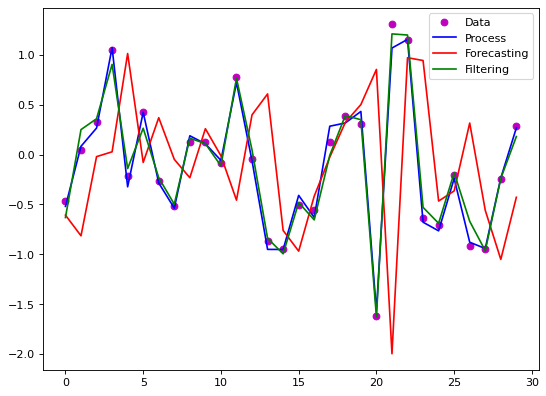

In [19]:
Xforecast,Xfilter = fun(mu_old,mu_new,sigma_old,sigma_new,Y)
plt.figure(figsize=(8,6), dpi = 80)
plt.plot(Y,'o', label = 'Data', color='m')
plt.plot(X,label = 'Process', color ='blue')
plt.plot(Xforecast, label = 'Forecasting', color ='red')
plt.plot(Xfilter, label = 'Filtering', color='green')
plt.legend()
plt.show()

For figure above we can see that there is no  much noise between data model and process model and we can see also that there is no big biases between filtering and process model while there is big bias between process model and forecasting

c)Standard deviation of the filtered and forecasted estimates together with their
errors

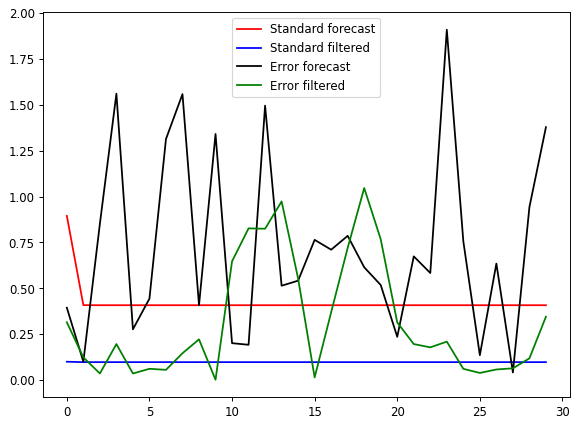

In [58]:
plt.figure(figsize=(8,6), dpi = 85)
plt.plot(np.sqrt(sigma_old),label='Standard forecast',color='red') 
plt.plot(np.sqrt(sigma_new),label='Standard filtered',color='blue')
plt.plot(abs(Xforecast-X),label='Error forecast',color='black')
plt.plot(abs(Xfilter-X),label='Error filtered',color='green')
plt.legend()
plt.show()

From figure above we can see that both standard filtered and forecast is stable from 1 whereas Error of both forecastg and filtered is time varying  i.e it is not canstant.

3)a)the one dimensional nonlinear process model

__Process model__

In [11]:
def N_PROCESS(al,q):
    X_0 = np.random.normal(0.1,0.01)
    X = np.zeros(60)
    X[0] = X_0
    for i in range (1,30):
        delt = np.random.normal(0,q)
        X[i] = al * X[i-1]*(1-X[i-1]) + delt
    return X

__Data model__

In [12]:
def N_DATA(X,r):
    n = len(X)
    Y = np.zeros(n)
    for i in range(0,n):
        ep = np.random.normal(0,r)
        Y[i]=X[i]+ep
    return Y

__Parameters__

In [13]:
al=0.9;q=0.001;r=0.005

__Plot__

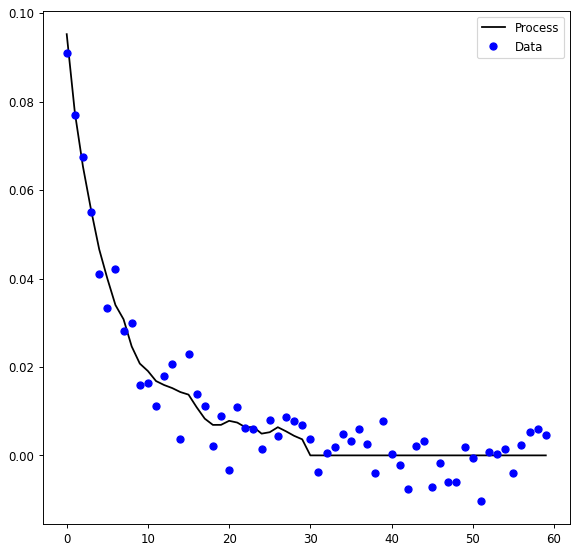

In [23]:
N_X=N_PROCESS(al,q)
N_Y=N_DATA(N_X,r)
plt.figure(figsize=(8,8), dpi = 85)
plt.plot(N_X,color ='black',label='Process')
plt.plot(N_Y,'o',color='blue',label='Data')
plt.legend()
plt.show()

__b. Kalman filter__

Approximation function

In [16]:
def L_APPROXIMATION(a_0,N_PROCESS):
    N=len(N_PROCESS)
    M_1=np.zeros(N)
    for i in range(N):
        M_1[i]=a_0*(1-2*N_PROCESS[i])
    return M_1

In [17]:
def KALMAN_EXT(mu_0,sig_0,M,M_1,Q,R,H,y):
    N = len(y)
    mu_OLD = np.zeros(N)
    sig_OLD = np.zeros(N)
    mu_NEW = np.zeros(N+1)
    mu_NEW[0] = mu_0
    sig_NEW = np.zeros(N+1)
    sig_NEW[0] = sig_0
    for t in range(1,N+1):
        mu_OLD[t-1] = M*mu_NEW[t-1]
        sig_OLD[t-1] = Q + M_1[t-1]*sig_NEW[t-1]*M_1[t-1]
        k = sig_OLD[t-1]*H*(H*sig_OLD[t-1]*H + R)**-1
        mu_NEW[t] = mu_OLD[t-1] + k*(y[t-1] - H*mu_OLD[t-1])
        sig_NEW[t] = (1 - k*H)*sig_OLD[t-1] 
    return mu_OLD, mu_NEW[1:], sig_OLD, sig_NEW [1:]

In [19]:
def ESTIMATION(mu_OLD,mu_NEW,sig_OLD,sig_NEW,y):
    N = len(y)
    X_FORE = np.zeros(N)
    X_FILT = np.zeros(N)
    for t in range(0,N):
        X_FORE[t] = np.random.normal(mu_OLD[t],np.sqrt(sig_OLD[t]))
        X_FILT[t] = np.random.normal(mu_NEW[t],np.sqrt(sig_NEW[t]))
    return X_FORE , X_FILT

q=0.001;r=0.005;mu_0 =0.1;sig_0=0.01;Q = q**2;R = r**2;H = 1;a=0.9

N_X1=N_PROCESS(a,q)

M_1=L_APPROXIMATION(a,N_X1)
mu_OLD,mu_NEW,sig_OLD,sig_NEW= KALMAN_EXT(mu_0,sig_0,a,M_1,Q,R,H,N_Y)


In [20]:
N_XFORE,N_XFILT = ESTIMATION(mu_OLD,mu_NEW,sig_OLD,sig_NEW,N_Y)

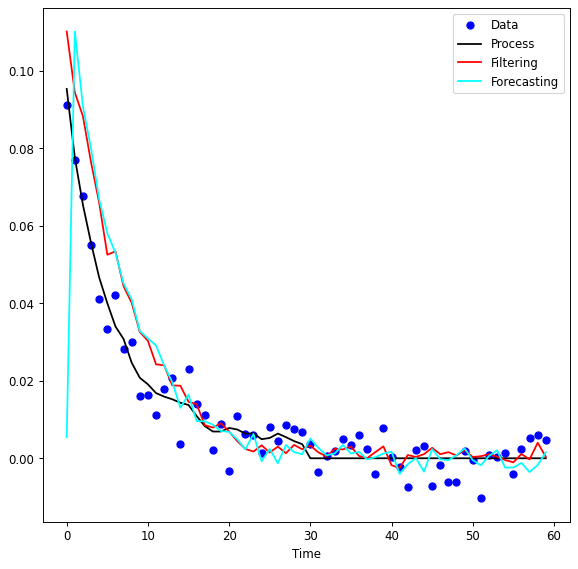

In [24]:
plt.figure(figsize=(8,8), dpi = 85)
plt.plot(N_Y,'o', label = 'Data', color='blue')
plt.plot(N_X,label = 'Process', color ='black')
plt.plot(N_XFILT, label = 'Filtering', color='red')
plt.plot(N_XFORE, label = 'Forecasting', color ='cyan')
plt.xlabel('Time')
plt.legend()
plt.show()

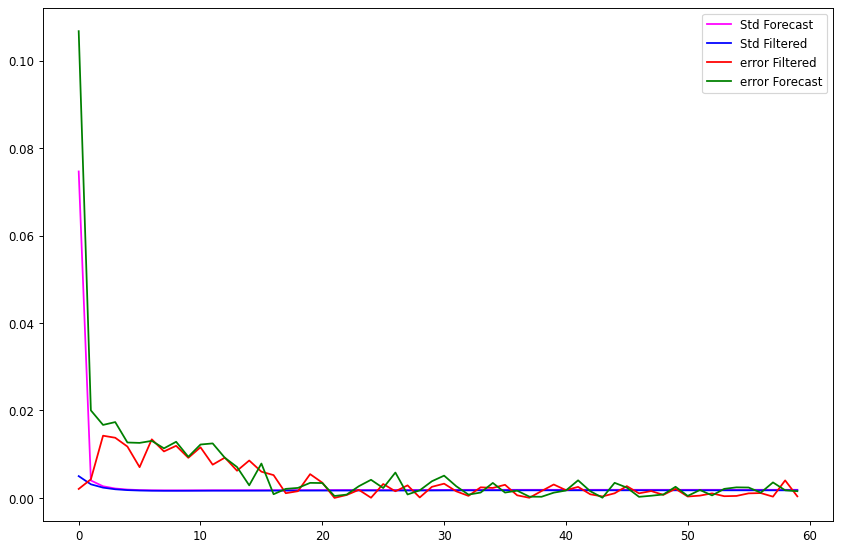

In [22]:
plt.figure(figsize=(12,8), dpi = 85)

plt.plot(np.sqrt(sig_OLD),label='Std Forecast',color ='magenta')
plt.plot(np.sqrt(sig_NEW),label='Std Filtered',color ='blue')
plt.plot(abs(N_XFILT-N_X),label='error Filtered',color ='red')
plt.plot(abs(N_XFORE-N_X),label='error Forecast',color ='green')
plt.legend()
plt.show()